In [ ]:
import pandas as pd 

data = pd.read_csv("train.csv")
data.head()

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL


In [ ]:
# Edgar Allan Poe, Mary Shelley and HP Lovecraft
def pretty_print_author_info(data, print_rows=100):
  for i in range(print_rows):
    if data.iloc[i].author == "EAP":
      print(f'ROW ---> {i}')
      print("Author Name: Edgar Allan Poe \nText: {}".format(data.iloc[i].text) )
    elif data.iloc[i].author == "HPL":
      print(f'ROW ---> {i}')
      print("Author Name: HP Lovecraft \nText: {}".format(data.iloc[i].text) )
    else:
      print(f'ROW ---> {i}')
      print("Author Name: Mary Shelley \nText: {}".format(data.iloc[i].text) )

In [ ]:
pretty_print_author_info(data, print_rows=100)

In [ ]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

In [ ]:
data.keys()

Index(['id', 'text', 'author'], dtype='object')

In [ ]:
data.shape

(19579, 3)

In [ ]:
data['author'] = enc.fit_transform(data.author)

In [ ]:
data.head()

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# remove punctuation
import string
def remove_punc(text):
  non_punc = []
  for char in text:
    if char not in string.punctuation:
      non_punc.append(char)
  
  return "".join(non_punc)

In [ ]:
# testing the remove_punc function 
random_string= """Wilbur's growth was indeed phenomenal, for within three months of his birth he had attained a size and muscular power not usually found in infants under a full year of age."""
print(remove_punc(random_string))

Wilburs growth was indeed phenomenal for within three months of his birth he had attained a size and muscular power not usually found in infants under a full year of age


In [ ]:
# lemmatization 
from nltk.stem import WordNetLemmatizer

def lemmatization(nopunct_sentence):
  lemmatizer = WordNetLemmatizer()
  if any(punc in nopunct_sentence for punc in string.punctuation):
    raise Exception("The sentence contains punctuation")
  else:
    lem_string=""
    list_of_words = nopunct_sentence.split()
    for word in list_of_words:
      lemma = lemmatizer.lemmatize(word, pos="v")
      lem_string += lemma + " "
    return lem_string

In [ ]:
 print(lemmatization(remove_punc(random_string)) )

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
def stopwords_removal(sentence):
  stop_words = stopwords.words('english')
  fine_tuned_sentence =[]
  for word in sentence.split():
    if word not in stop_words:
      fine_tuned_sentence.append(word)
  return fine_tuned_sentence

In [ ]:
print(stopwords_removal(lemmatization(remove_punc(random_string))))

['Wilburs', 'growth', 'indeed', 'phenomenal', 'within', 'three', 'months', 'birth', 'attain', 'size', 'muscular', 'power', 'usually', 'find', 'infants', 'full', 'year', 'age']


In [ ]:
def process_sentence(text):
    no_punct = remove_punc(text)
    lem_sen = lemmatization(no_punct)
    return stopwords_removal(lem_sen)

In [ ]:
features = data['text']
labels = data['author']

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
bow_transformer=CountVectorizer(analyzer=process_sentence).fit(features)

In [ ]:
features = bow_transformer.transform(features)

In [ ]:
features.shape

(19579, 22275)

In [ ]:
# spillting the data into train and text
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(15663, 22275)
(3916, 22275)


#### Model Implementation

In [ ]:
from sklearn.neural_network import MLPClassifier
nn_model = MLPClassifier(hidden_layer_sizes=[7, 11, 5] , activation='relu', solver ='adam',  max_iter=500)

In [ ]:
nn_model.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=[7, 11, 5], learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
print("The training accuracy of the model is {:.2f}".format(nn_model.score(X_train, y_train)*100) )

The training accuracy of the model is 100.00


In [ ]:
print("The training accuracy of the model is {:.2f}".format(nn_model.score(X_test, y_test)*100) )

The training accuracy of the model is 77.07


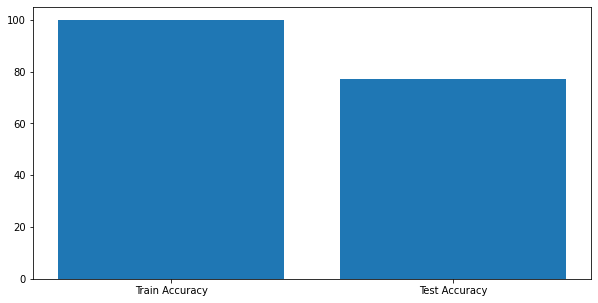

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,5))
names = ["Train Accuracy", "Test Accuracy"]
acc = [100., 77.07]

plt.bar(names, acc)
plt.savefig("acc.png", bbox_inches = "tight")

### Working with the testing data

In [ ]:
kaggle_test_data = pd.read_csv('test.csv')
kaggle_test_data.head()

,id,text
0,id02310,"Still, as I urged our leaving Ireland with suc..."
1,id24541,"If a fire wanted fanning, it could readily be ..."
2,id00134,And when they had broken down the frail door t...
3,id27757,While I was thinking how I should possibly man...
4,id04081,I am not sure to what limit his knowledge may ...


In [ ]:
# processing the testing data 
X_test_kaggle = bow_transformer.transform(kaggle_test_data['text'])

In [ ]:
nn_model.predict(X_test_kaggle[0])

array([2])

## Data Visualization

In [ ]:
data = pd.read_csv("train.csv")
data.head()

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL


In [ ]:
# displaying the WordCloud of each author 
# Edgar Allan Poe, Mary Shelley and HP Lovecraft (EAP, MWS, HPL)
EAP_arr = data.loc[data['author'] == "EAP"]
MWS_arr = data.loc[data['author'] == 'MWS']
HPL_arr = data.loc[data['author'] == 'HPL']

In [ ]:
EAP_arr.head()

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
6,id09674,"The astronomer, perhaps, at this point, took r...",EAP
7,id13515,The surcingle hung in ribands from my body.,EAP
8,id19322,I knew that you could not say to yourself 'ste...,EAP


In [ ]:
def make_corpus_of_strings(dataframe):
    bag_of_strings = ""
    for row in range(dataframe.shape[0]):
      text = dataframe.iloc[row]['text'].strip()
      text+=" "
      bag_of_strings += text
    return bag_of_strings


In [ ]:
bos_eap = make_corpus_of_strings(EAP_arr)
bos_mws = make_corpus_of_strings(MWS_arr)
bos_hpl = make_corpus_of_strings(HPL_arr)


In [ ]:
print(bos_eap)

This process, however, afforded me no means of ascertaining the dimensions of my dungeon; as I might make its circuit, and return to the point whence I set out, without being aware of the fact; so perfectly uniform seemed the wall. In his left hand was a gold snuff box, from which, as he capered down the hill, cutting all manner of fantastic steps, he took snuff incessantly with an air of the greatest possible self satisfaction. The astronomer, perhaps, at this point, took refuge in the suggestion of non luminosity; and here analogy was suddenly let fall. The surcingle hung in ribands from my body. I knew that you could not say to yourself 'stereotomy' without being brought to think of atomies, and thus of the theories of Epicurus; and since, when we discussed this subject not very long ago, I mentioned to you how singularly, yet with how little notice, the vague guesses of that noble Greek had met with confirmation in the late nebular cosmogony, I felt that you could not avoid casting

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# for the author EAP
eap_wordcloud = WordCloud().generate("".join([word+" " for word in process_sentence(bos_eap)]))
plt.imshow(eap_wordcloud, interpolation='bilinear')
plt.show()
plt.savefig("eap.png", bbox_inches="tight")

NameError: ignored

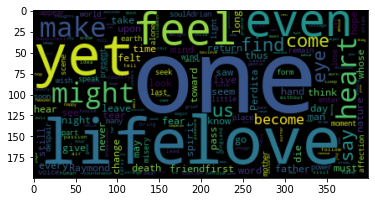

<Figure size 432x288 with 0 Axes>

In [ ]:
# for the author MWS
mws_wordcloud = WordCloud().generate("".join([word+" " for word in process_sentence(bos_mws)]) )
plt.imshow(mws_wordcloud, interpolation='bilinear')
plt.show()
plt.savefig("mws.png", bbox_inches="tight")

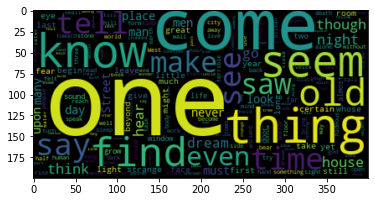

<Figure size 432x288 with 0 Axes>

In [ ]:
# for the author HPL
hpl_wordcloud = WordCloud().generate("".join([word+" " for word in process_sentence(bos_hpl)]))
plt.imshow(hpl_wordcloud, interpolation='bilinear')
plt.show()
plt.savefig("hpl.png", bbox_inches="tight")

### Making all the predictions

In [ ]:
nn_model.predict(X_test_kaggle[0])

In [ ]:
pred = enc.inverse_transform(nn_model.predict(X_test_kaggle))

In [ ]:
# Adding labels to the test data

kaggle_test_data["predicted_labels"] = pred
kaggle_test_data.head()

In [ ]:
nn_model.predict(X_test_kaggle[0])